In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [24]:
# Імпортуємо датасет
df_raw = pd.read_csv('germany.csv')

In [25]:
df_raw

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2020,continentExp
0,330,661,10265,01/01/2021,1,1,2021,10270.0,420.0,Germany,DE,DEU,83166711,Europe
1,331,660,10264,02/01/2021,2,1,2021,10022.0,594.0,Germany,DE,DEU,83166711,Europe
2,332,659,10263,03/01/2021,3,1,2021,8830.0,497.0,Germany,DE,DEU,83166711,Europe
3,333,658,10262,04/01/2021,4,1,2021,14304.0,777.0,Germany,DE,DEU,83166711,Europe
4,334,657,10261,05/01/2021,5,1,2021,27431.0,1042.0,Germany,DE,DEU,83166711,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,987,4,9608,20/10/2022,20,10,2022,83775.0,18.0,Germany,DE,DEU,83166711,Europe
658,988,3,9607,21/10/2022,21,10,2022,68084.0,14.0,Germany,DE,DEU,83166711,Europe
659,989,2,9606,22/10/2022,22,10,2022,15259.0,1.0,Germany,DE,DEU,83166711,Europe
660,990,1,9605,23/10/2022,23,10,2022,8662.0,1.0,Germany,DE,DEU,83166711,Europe


In [26]:
# Обираємо потрібні стовпчики
df = df_raw[['dateRep', 'cases', 'deaths']]

In [27]:
df

,dateRep,cases,deaths
0,01/01/2021,10270.0,420.0
1,02/01/2021,10022.0,594.0
2,03/01/2021,8830.0,497.0
3,04/01/2021,14304.0,777.0
4,05/01/2021,27431.0,1042.0
...,...,...,...
657,20/10/2022,83775.0,18.0
658,21/10/2022,68084.0,14.0
659,22/10/2022,15259.0,1.0
660,23/10/2022,8662.0,1.0


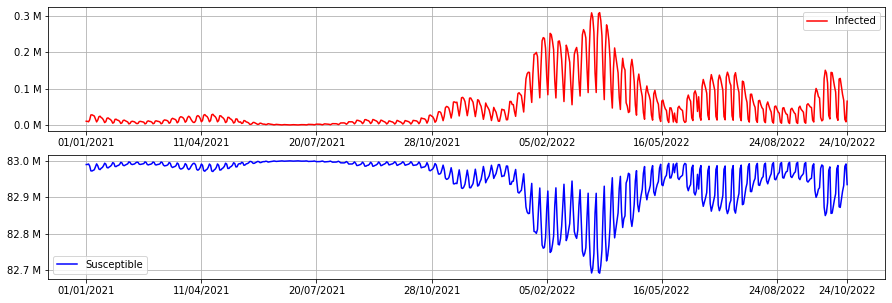

In [28]:
# Аналіз фактичних даних

population = 83000000 # 83 мільйони - населення Німеччини

dates = df['dateRep'] # Список дат
I = df['cases'] # Список зареєстрованих випадків інфікування
S = population - I # Список вразливих

# Графіки

fig, axs = plt.subplots(2, figsize=(15, 5))

# Інфіковані

axs[0].plot(dates, I, label='Infected', color='r')

axs[0].set_xticks(dates[(dates.index % 100 == 0) | (dates.index == 661)])
axs[0].yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '%0.1f M' % (x * 1e-6)))
axs[0].legend()
axs[0].grid()

# Cприятливі інфекції

axs[1].plot(dates, S, label='Susceptible', color='b')

axs[1].set_xticks(dates[(dates.index % 100 == 0) | (dates.index == 661)])
axs[1].yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '%0.1f M' % (x * 1e-6)))
axs[1].legend()
axs[1].grid()

plt.show()

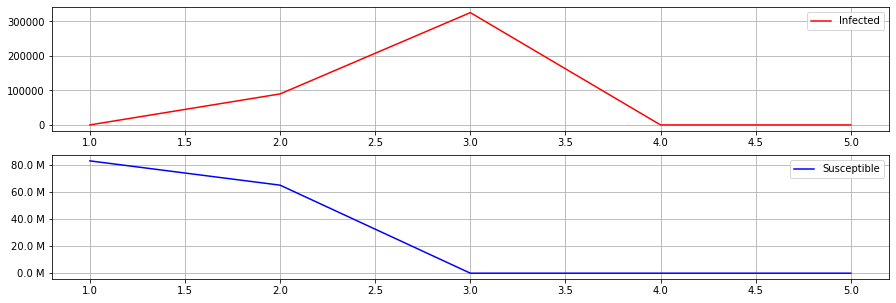

In [29]:
# Теоретичний аналіз
t_max = 5 # Час

# Пусті списки
I = np.zeros(t_max) # Інфіковані
S = np.zeros(t_max) # Вразливі
p = np.zeros(t_max) # Ймовірність інфікування

I[0] = 10270 # Інфіковані у перший день (взято з фактичних значень)
S[0] = 83000000 # Сприятливі у перший день (населення Німеччини)
p[0] = I[0] / S[0] # Ймовірність зараження у перший час

# Застосування моделі Ріда-Фроста
for t in range(t_max - 1):
    I[t + 1] = S[t] * (1 - np.power(1 - p[t] + 0.0001, I[t]))
    S[t + 1] = S[t] - I[t + 1]
    p[t + 1] = I[t] / (S[t] + 0.0001)

# Графіки

fig, axs = plt.subplots(2, figsize=(15, 5))

# Інфіковані. Гіпотетичні значення.

axs[0].plot(np.arange(1, t_max + 1), I, label='Infected', color='r')
axs[0].yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '%0d' % (x * 0.5e-2)))
axs[0].legend()
axs[0].grid()

# Сприятливі. Гіпотетичні значення.

axs[1].plot(np.arange(1, t_max + 1), S, label='Susceptible', color='b')
axs[1].yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '%0.1f M' % (x * 1e-6)))
axs[1].legend()
axs[1].grid()

plt.show()